In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
from sklearn.preprocessing import RobustScaler

In [4]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [5]:
elderly_life=pd.read_csv("노인생활인구_최종.csv",encoding="cp949")
elderly_build=pd.read_csv("노인시설수_최종.csv",encoding="cp949")
market=pd.read_csv("행정동별_유통업체_노인.csv",encoding="cp949")
hospital=pd.read_csv("의료기관수_노인.csv",encoding="cp949")

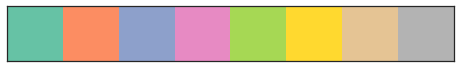

In [6]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

# 노인생활인구_ 노인교통사고 clustering

In [7]:
elderly_traffic=pd.read_csv("노인환산교통사고.csv",encoding="cp949")
elderly_traffic

,행정동,환산건
0,가락1동,1.119
1,가락2동,0.387
2,가락본동,0.494
3,가리봉동,0.000
4,가산동,0.000
...,...,...
417,효창동,0.000
418,후암동,0.000
419,휘경1동,0.000
420,휘경2동,0.000


In [8]:
elderly_life

,행정동,전체평균
0,가락1동,6173
1,가락2동,5619
2,가락본동,7463
3,가리봉동,2121
4,가산동,6771
...,...,...
417,효창동,2089
418,후암동,2825
419,휘경1동,3352
420,휘경2동,3962


In [9]:
df2=pd.concat([elderly_life,elderly_traffic],axis=1)
df2

,행정동,전체평균,행정동,환산건
0,가락1동,6173,가락1동,1.119
1,가락2동,5619,가락2동,0.387
2,가락본동,7463,가락본동,0.494
3,가리봉동,2121,가리봉동,0.000
4,가산동,6771,가산동,0.000
...,...,...,...,...
417,효창동,2089,효창동,0.000
418,후암동,2825,후암동,0.000
419,휘경1동,3352,휘경1동,0.000
420,휘경2동,3962,휘경2동,0.000


In [10]:
df2=pd.concat([elderly_life,elderly_traffic],axis=1)

In [11]:
df2

,행정동,전체평균,행정동,환산건
0,가락1동,6173,가락1동,1.119
1,가락2동,5619,가락2동,0.387
2,가락본동,7463,가락본동,0.494
3,가리봉동,2121,가리봉동,0.000
4,가산동,6771,가산동,0.000
...,...,...,...,...
417,효창동,2089,효창동,0.000
418,후암동,2825,후암동,0.000
419,휘경1동,3352,휘경1동,0.000
420,휘경2동,3962,휘경2동,0.000


In [12]:
# 사고수 0인 행정동 제거 (df2_acc)
df2_acc = df2.drop(index = df2[df2['환산건']==0].index)
df2_acc
df2_acc=df2_acc.reset_index(drop=True)
df2_acc

,행정동,전체평균,행정동,환산건
0,가락1동,6173,가락1동,1.119
1,가락2동,5619,가락2동,0.387
2,가락본동,7463,가락본동,0.494
3,가양1동,7093,가양1동,1.500
4,가양2동,5035,가양2동,3.511
...,...,...,...,...
304,화곡6동,4405,화곡6동,0.268
305,화곡8동,6461,화곡8동,0.435
306,화곡본동,5862,화곡본동,0.378
307,화양동,4492,화양동,0.520


In [13]:
# scaling
scaler = RobustScaler()
df2_scale=pd.DataFrame(scaler.fit_transform(df2_acc[['전체평균','환산건']]),columns=df2_acc[['전체평균','환산건']].columns)
df2_scale.insert(0, '행정동',df2.iloc[:,-2])
df2_scale

,행정동,전체평균,환산건
0,가락1동,0.528727,0.355397
1,가락2동,0.320691,-0.390020
2,가락본동,1.013143,-0.281059
3,가리봉동,0.874202,0.743381
4,가산동,0.101389,2.791242
...,...,...,...
304,월곡1동,-0.135186,-0.511202
305,월곡2동,0.636876,-0.341141
306,위례동,0.411941,-0.399185
307,은천동,-0.102516,-0.254582


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


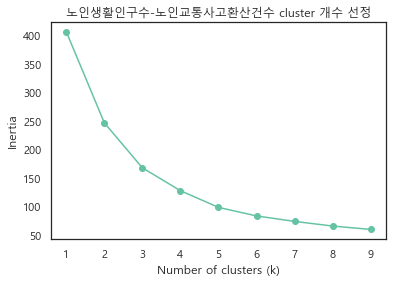

In [14]:
data = df2_scale.values
X=data[:,1:] # 행정동명 제외
num_clusters = list(range(1,10))
inertias = []

# elbow
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구수-노인교통사고환산건수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '노인 생활인구와 노인 교통사고 clustering')

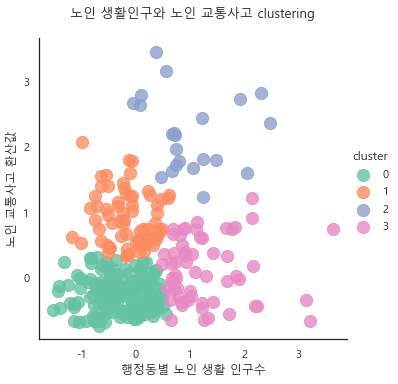

In [15]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df2_scale['cluster'] = kmeans.labels_

sns.lmplot(x = '전체평균',y = '환산건', data = df2_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('노인 교통사고 환산값')
plt.title('노인 생활인구와 노인 교통사고 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster 2 (상단) 선택

In [16]:
result=df2_scale[df2_scale["cluster"]==2]
result

,행정동,전체평균,환산건,cluster
4,가산동,0.101389,2.791242,2
18,거여1동,-0.042809,2.674134,2
19,거여2동,1.919640,2.727088,2
20,고덕1동,1.242959,1.814664,2
24,공덕동,1.248216,1.231161,2
50,남가좌1동,0.680060,2.197556,2
53,남현동,0.796095,1.775967,2
100,망원1동,0.669170,1.624236,2
104,면목4동,0.557266,3.156823,2
129,발산1동,2.051070,1.601833,2


In [17]:
result.to_csv("노인생활인구_노인교통사고환산_KMEANS.csv",encoding="cp949")